<a href="https://colab.research.google.com/github/BVishnu9/HackNite_IPLAuction2024/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Statistics.csv')
df['PRICE PAID'] = df['PRICE PAID'].str.replace(',', '').astype(int)
df['PRICE PAID'] = df['PRICE PAID']//(100000)
df.rename(columns={'PRICE PAID':'PRICE PAID(in lakhs)'},inplace=True)
df.head()

,PLAYER,NATIONALITY,TYPE,PRICE PAID(in lakhs),TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,20,CSK
1,Mustafizur Rahman,Overseas,Bowler,200,CSK
2,Daryl Mitchell,Overseas,All-Rounder,1400,CSK
3,Sameer Rizvi,Indian,Batter,840,CSK
4,Rachin Ravindra,Overseas,All-Rounder,180,CSK


1st graph - No. of Indian and Overseas players of each team

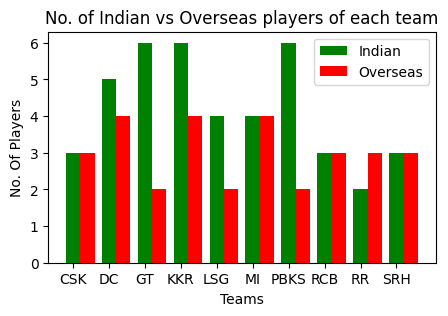

In [ ]:
width = 0.4
teams = ['CSK','DC','GT','KKR','LSG','MI','PBKS','RCB','RR','SRH']
count = df.groupby(['TEAM', 'NATIONALITY']).size().unstack(fill_value=0)
count.columns = ['Indians', 'Overseas']
plt.figure(figsize=(5,3))

num = np.arange(len(teams))
plt.xticks(num,teams)
plt.bar(num,count['Indians'],width = width, color = 'green',label = 'Indian')
plt.bar(num+width,count['Overseas'],width = width,color ='red',label = 'Overseas')

plt.xlabel('Teams')
plt.ylabel('No. Of Players')
plt.title("No. of Indian vs Overseas players of each team")
plt.legend()
plt.show()

We can see that, DC,GT,KKR,LSG and PBKS bough more number of Indian players than Overseas Players.
While, CSK, MI, RCB and SRH bought equal number of Indian and Overseas players.
RR bought less number of Indian players than Overseas players.

SO, maximum number of teams rely on Indian players than Overseas players

2nd graph - Histogram of price ranges vs. No. of players

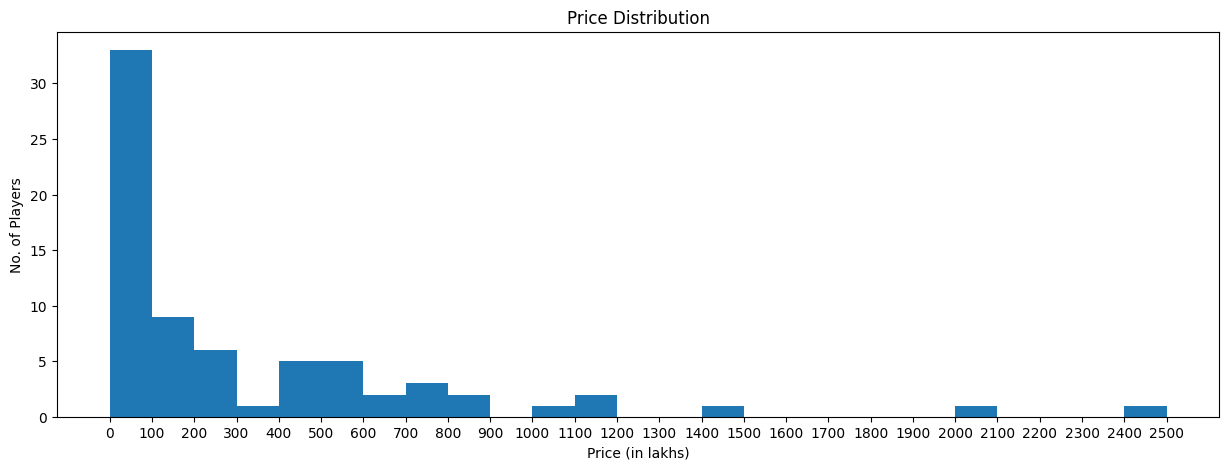

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df['PRICE PAID(in lakhs)'],bins = np.arange(0,2600,100))
plt.xticks(np.arange(0,2600,100))
plt.xlabel('Price (in lakhs)')
plt.ylabel('No. of Players')
plt.title('Price Distribution')

plt.show()


Here, maximum number of players are bought for less than 100 lakh(1 crore) rupees. This signifies that most players are bought at the price around their base price. One player was bought at maximum price whcih falls in between 2400-2500 lakhs.

3rd - Piechart of distribution of players based on type

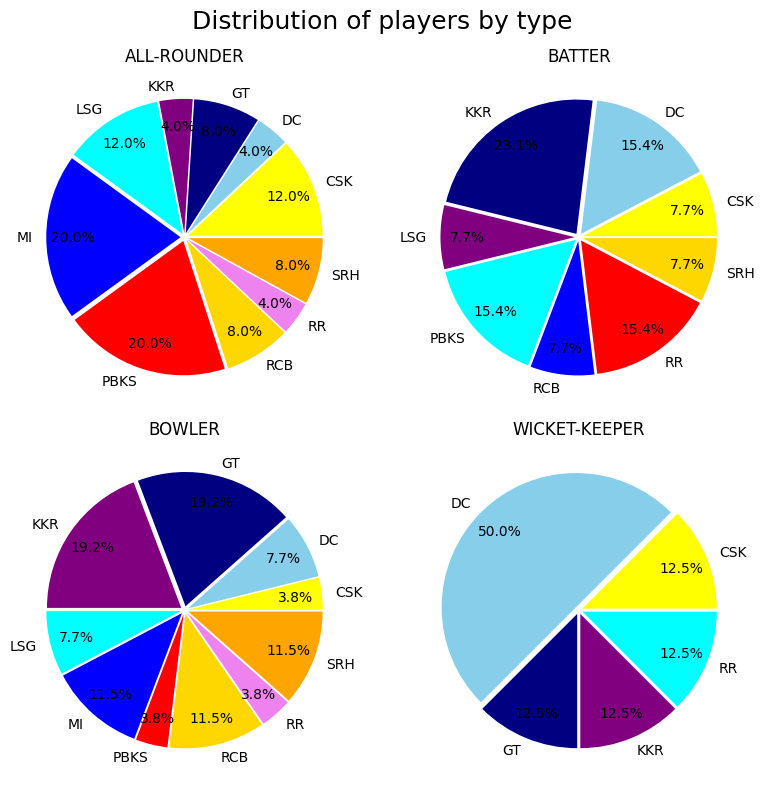

In [ ]:
types=df.groupby(['TEAM','TYPE']).size().unstack(fill_value=0)
types.columns=['ALL-ROUNDER','BATTER','BOWLER','WICKET-KEEPER']
types = types.groupby(['TEAM']).mean().reset_index()
types = types.applymap(lambda y :int(y) if type(y)==float else y)

colors = ['yellow','#87CEEB','#000080', 'purple','cyan','blue','red','#FFD700','violet','orange']

fig, ax = plt.subplots(2, 2,figsize = (8,8))
fig.suptitle('Distribution of players by type', fontsize=18)

#1st pie
type1 = types.loc[lambda types:types['ALL-ROUNDER'] != 0]
ax[0, 0].pie(type1['ALL-ROUNDER'], labels=teams, autopct='%0.1f%%', colors =colors, pctdistance=0.8,explode = [0.03] * len(type1))
ax[0,0].set_title('ALL-ROUNDER')

#2nd pie
type2 = types.loc[lambda types:types['BATTER'] != 0]
ax[0, 1].pie(type2['BATTER'], labels=type2['TEAM'], autopct='%0.1f%%', colors =colors, pctdistance=0.8, explode = [0.03] * len(type2))
ax[0,1].set_title('BATTER')

#3rd pie
type3 = types.loc[lambda types:types['BOWLER'] != 0]
ax[1, 0].pie(type3['BOWLER'], labels=type3['TEAM'], autopct='%0.1f%%', colors =colors, pctdistance=0.8, explode = [0.03] * len(type3))
ax[1,0].set_title('BOWLER')

#4th pie
type4 = types.loc[lambda types:types['WICKET-KEEPER'] != 0]
ax[1, 1].pie(type4['WICKET-KEEPER'], labels=type4['TEAM'], autopct='%0.1f%%', colors =colors, pctdistance=0.8, explode=[0.03]*len(type4))
ax[1,1].set_title('WICKET-KEEPER')

fig.tight_layout()
plt.show()

We can see that, MI bought the most number of ALL-ROUNDERS.
KKR bought the most number of BATTERS while GT and MI bought zero BATTERS.
GT and KKR bought the equal number of BOWLERS.
CSK bought the most number of WICKET-KEEPERS while LSG,MI,PBKS,RCB and SRH bought zero WICKET-KEEPERS.

4th - Top 10 players

In [ ]:
amount = df.sort_values(by='PRICE PAID(in lakhs)', ascending = False).head(10)
amount = amount.reset_index(drop=True)
amount

,PLAYER,NATIONALITY,TYPE,PRICE PAID(in lakhs),TEAM
0,Mitchell Starc,Overseas,Bowler,2475,KKR
1,Pat Cummins,Overseas,All-Rounder,2050,SRH
2,Daryl Mitchell,Overseas,All-Rounder,1400,CSK
3,Harshal Patel,Indian,All-Rounder,1175,PBKS
4,Alzarri Joseph,Overseas,Bowler,1150,RCB
5,Spencer Johnson,Overseas,Bowler,1000,GT
6,Sameer Rizvi,Indian,Batter,840,CSK
7,Rilee Rossouw,Overseas,Batter,800,PBKS
8,Rovman Powell,Overseas,Batter,740,RR
9,Shahrukh Khan,Indian,All-Rounder,740,GT


We can see that most of the top 10 players(based on price) are from Overseas.
Top 5 players are either of the type BOWLER or ALL-ROUNDER, so we can say that there is high demand for ALL-ROUNDERS and BOWLERS  